In [24]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100

import seaborn as sns
sns.set_style("whitegrid")

df = pd.read_csv("covid19_tweets.csv")
df = df[0:10000]

import re

def clean(s):
    s = s.replace(r'™', "\'")
    s = s.replace(r'â€', "\i")
    s = re.sub(r'<br */*>', "\n", s)
    s = s.replace("&lt;", "<").replace("&gt;", ">").replace("&amp;", "&")
    s = s.replace("&amp;", "&")
    # markdown urls
    s = re.sub(r'\(https*://[^\)]*\)', "", s)
    # normal urls
    s = re.sub(r'https*://[^\s]*', "", s)
    s = re.sub(r'_+', ' ', s)
    s = re.sub(r'"+def my_tokenizer(text):
    return text.split() if text != None else []', '"', s)
    return str(s)


df["text_clean"] = ''
for i, row in df.iterrows():
    df.at[i, "text_clean"] = clean(row.text)
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,text_clean
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,5/26/2017 5:46,624,950,18775,False,7/25/2020 12:27,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,If I smelled the scent of hand sanitizers toda...
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",4/16/2009 20:06,2253,1677,24,True,7/25/2020 12:27,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2/28/2009 18:57,9275,9525,7254,False,7/25/2020 12:27,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,3/7/2019 1:45,197,987,1488,False,7/25/2020 12:27,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,@brookbanktv The one gift #COVID19 has give me...
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2/12/2017 6:45,101009,168,101,False,7/25/2020 12:27,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,25 July : Media Bulletin on Novel #CoronaVirus...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,rugby365.com,Following the oval ball!,Real time rugby! One of the most popular rugby...,5/18/2009 10:46,35049,8505,1654,False,7/25/2020 5:43,#ICYMI: New @wallabies coach Dave Rennie will ...,['ICYMI'],Twitter Web App,False,#ICYMI: New @wallabies coach Dave Rennie will ...
9996,Mirza Hyderabad. (میرزا حیدرآ...,India,Anti Bhakt patriot,1/8/2010 15:52,2471,624,17435,False,7/25/2020 5:43,So we are touching 1 L #COVID19 cases in just ...,['COVID19'],Twitter Web App,False,So we are touching 1 L #COVID19 cases in just ...
9997,p2,"Utah, USA",NaN,1/13/2010 18:33,337,164,257,False,7/25/2020 5:43,Which entity do I submit a word spelling chang...,NaN,Twitter for Android,False,Which entity do I submit a word spelling chang...
9998,Muhammad Jahangir Kabir,"Dhaka, Bangladesh",Lifestyle Modifier,2/28/2013 6:43,686,7,19,False,7/25/2020 5:43,করোনায় চোখের যত্নে করনীয়\nFACEBOOK LINK:http...,NaN,Twitter Web App,False,করোনায় চোখের যত্নে করনীয়\nFACEBOOK LINK: \n\...


In [25]:
df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
text_clean          object
dtype: object

In [26]:
df[['user_name', 'user_description', 'user_verified', 'text_clean']].sample(4, random_state=41)

,user_name,user_description,user_verified,text_clean
9745,Nazaket Rather,Study :- PhD commerce Department\n\nDouble PG ...,False,Total #COVID19 positive cases in Maharashtra P...
4492,The Hindu - Chennai,The official twitter account of The Hindu's re...,True,Many private hospitals are finding it difficul...
3439,IANSLIFE,NaN,False,#Hollywood couple #CatherineZetaJones and #Mic...
6077,Hans Homini Bot,A very happy European looking forward to a bri...,False,🇧🇷 Brazil’s 7-day average number of daily new ...


In [27]:
df['user_verified'].describe(include=np.object)

count     10000
unique        2
top       False
freq       8623
Name: user_verified, dtype: object

In [29]:
cat_df = df.groupby('user_verified').size()
            
# show top 5 records
cat_df.head(5)

user_verified
False    8623
True     1377
dtype: int64

<AxesSubplot:xlabel='user_verified'>

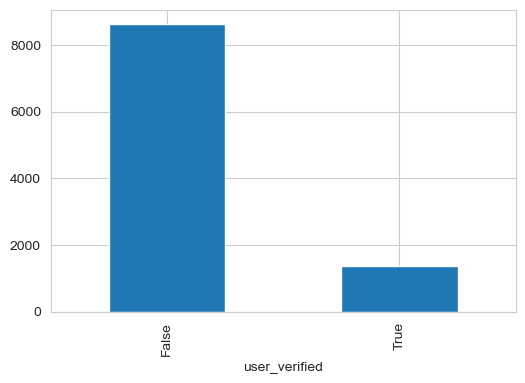

In [30]:
cat_df.plot(kind='bar')

In [31]:
cat_df.describe()

count       2.000000
mean     5000.000000
std      5123.695736
min      1377.000000
25%      3188.500000
50%      5000.000000
75%      6811.500000
max      8623.000000
dtype: float64

In [32]:
import spacy
nlp = spacy.load('en_core_web_sm')

for i, row in df.iterrows():
    if i % 1000 == 0:
        print(i)
    if(row["text_clean"] and len(str(row["text_clean"])) < 1000000):
        doc = nlp(str(row["text_clean"]))
        adjectives = []
        nouns = []
        verbs = []
        lemmas = []

        for token in doc:
            lemmas.append(token.lemma_)
            if token.pos_ == "ADJ":
                adjectives.append(token.lemma_)
            if token.pos_ == "NOUN" or token.pos_ == "PROPN":
                nouns.append(token.lemma_)
            if token.pos_ == "VERB":
                verbs.append(token.lemma_)
                
        df.at[i, "text_lemma"] = " ".join(lemmas)                
        df.at[i, "text_nouns"] = " ".join(nouns)
        df.at[i, "text_adjectives"] = " ".join(adjectives)
        df.at[i, "text_verbs"] = " ".join(verbs)
        df.at[i, "text_nav"] = " ".join(nouns+adjectives+verbs)
        df.at[i, "no_tokens"] = len(lemmas)


0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [41]:
df


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,text_clean,text_lemma,text_nouns,text_adjectives,text_verbs,text_nav,no_tokens
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,5/26/2017 5:46,624,950,18775,False,7/25/2020 12:27,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,If I smelled the scent of hand sanitizers toda...,if -PRON- smell the scent of hand sanitizer to...,scent hand sanitizer today past,intoxicated,smell would think,scent hand sanitizer today past intoxicated sm...,24.0
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",4/16/2009 20:06,2253,1677,24,True,7/25/2020 12:27,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,hey @Yankees @YankeesPR and @MLB - would not -...,@Yankees @YankeesPR @MLB sense player respect a,more,would make pay,@Yankees @YankeesPR @MLB sense player respect ...,24.0
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2/28/2009 18:57,9275,9525,7254,False,7/25/2020 12:27,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,@diane3443 @wdunlap @realDonaldTrump Trump nev...,@diane3443 @wdunlap @realDonaldTrump Trump nev...,@realDonaldTrump Trump # COVID19 hoax effort,,claim claim,@realDonaldTrump Trump # COVID19 hoax effort c...,21.0
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,3/7/2019 1:45,197,987,1488,False,7/25/2020 12:27,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,@brookbanktv The one gift #COVID19 has give me...,@brookbanktv the one gift # covid19 have give ...,gift # covid19 appreciation thing,simple,give,gift # covid19 appreciation thing simple give,22.0
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2/12/2017 6:45,101009,168,101,False,7/25/2020 12:27,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel # coronaviru...,July Media Bulletin Novel # covid19 @airnewsal...,,coronavirusupdate,July Media Bulletin Novel # covid19 @airnewsal...,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,rugby365.com,Following the oval ball!,Real time rugby! One of the most popular rugby...,5/18/2009 10:46,35049,8505,1654,False,7/25/2020 5:43,#ICYMI: New @wallabies coach Dave Rennie will ...,['ICYMI'],Twitter Web App,False,#ICYMI: New @wallabies coach Dave Rennie will ...,# icymi : new @wallabie coach Dave Rennie will...,icymi @wallabie coach Dave Rennie decision bui...,# new few tough,will make,icymi @wallabie coach Dave Rennie decision bui...,27.0
9996,Mirza Hyderabad. (میرزا حیدرآ...,India,Anti Bhakt patriot,1/8/2010 15:52,2471,624,17435,False,7/25/2020 5:43,So we are touching 1 L #COVID19 cases in just ...,['COVID19'],Twitter Web App,False,So we are touching 1 L #COVID19 cases in just ...,so -PRON- be touch 1 l # covid19 case in just ...,l # covid19 case day,,touch,l # covid19 case day touch,14.0
9997,p2,"Utah, USA",NaN,1/13/2010 18:33,337,164,257,False,7/25/2020 5:43,Which entity do I submit a word spelling chang...,NaN,Twitter for Android,False,Which entity do I submit a word spelling chang...,which entity do -PRON- submit a word spelling ...,entity word spelling change Quarantine Corantine,,submit should change would,entity word spelling change Quarantine Coranti...,24.0
9998,Muhammad Jahangir Kabir,"Dhaka, Bangladesh",Lifestyle Modifier,2/28/2013 6:43,686,7,19,False,7/25/2020 5:43,করোনায় চোখের যত্নে করনীয়\nFACEBOOK LINK:http...,NaN,Twitter Web App,False,করোনায় চোখের যত্নে করনীয়\nFACEBOOK LINK: \n\...,করোনায় চোখের যত্নে করনীয় \n FACEBOOK LINK : ...,করোনায় চোখের করনী

In [77]:
# create a data frame slice
sub_df = df[df['user_verified']==True]

# sample cleaned text and tokens tagged as nouns
sub_df[['user_verified', 'text_nouns']].sample(10)

,user_verified,text_nouns
2063,True,BREAKING NEWS tester town battle covid19 # Nor...
1773,True,# Covid19 collapse activity response governmen...
6937,True,colleague experience work life COVID-19 Captur...
2385,True,woman effect gender inequality scena
4719,True,Coronavirus number Covid-19 patient Republic h...
5076,True,covid19 pandemic university EUA presentation o...
3275,True,# Covid19 pandemic woman job
1,True,@Yankees @YankeesPR @MLB sense player respect a
7755,True,# Gujarat CM @vijayrupanibjp state spread Covi...
9432,True,joke president golf game people #


In [78]:
def my_tokenizer(text):
    return text.split() if text != None else []
tokens = sub_df.text_nouns.map(my_tokenizer).sum()
print(tokens[:100])

['@Yankees', '@YankeesPR', '@MLB', 'sense', 'player', 'respect', 'a', 'Coronavirus', 'South', 'Africa', 'update', 'South', 'Africa', 'July', 'sa', '@MoetiTshidi', '@WHOAFRO', '#', 'Kolar', '#', 'blood', 'type', 'b', 'Jalappa', 'Hospital', 'blood', 'Component', 'Plasma', 'B+ve', '#', 'covid19', '#', 'covid19', 'podcast', 'episode', 'week', '-Technology', 'platform', 'visit', '#', 'Delhi', '#', 'case', 'death', 'Saturday', 'death', 'toll', 'ANI', 'quot', '#', '📍', 'mask', 'accessory', 't', 'measure', 'government', 'covid19', 'action', 'country', '#', 'Covid19', 'disaster', '@fabeha', 'monir', 'vi', '#', 'NSTworld', 'NDR', 'year', 'distancing', 'requirement', 'result', 'o', 'woman', 'lawyer', 'AmitShah', 'Lakh', 'Loan', 'lawyer', '#', '#', 'Coronavirus', 'head', 'decision', 'safety', 'covid19', 'government', 'playyourpart', 'fight', 'Covid19', 'Cavan', 'Ladies', 'Footballer', 'Aishli', 'bihar', 'witness', 'day', 'spike', '#', 'Covid19']


In [79]:
from collections import Counter

counter = Counter(tokens)
counter.most_common(20)

[('#', 791),
 ('covid19', 507),
 ('case', 225),
 ('COVID19', 160),
 ('Covid19', 103),
 ('July', 79),
 ('day', 75),
 ('test', 68),
 ('Coronavirus', 60),
 ('death', 56),
 ('India', 55),
 ('number', 52),
 ('people', 51),
 ('coronavirus', 51),
 ('blood', 48),
 ('today', 48),
 ('lockdown', 48),
 ('recovery', 44),
 ('patient', 43),
 ('CM', 40)]

In [80]:
def remove_hashtag(tokens):
    return [t for t in tokens if t != "#"]

counter = Counter(remove_hashtag(tokens))
counter.most_common(20)

[('covid19', 507),
 ('case', 225),
 ('COVID19', 160),
 ('Covid19', 103),
 ('July', 79),
 ('day', 75),
 ('test', 68),
 ('Coronavirus', 60),
 ('death', 56),
 ('India', 55),
 ('number', 52),
 ('people', 51),
 ('coronavirus', 51),
 ('blood', 48),
 ('today', 48),
 ('lockdown', 48),
 ('recovery', 44),
 ('patient', 43),
 ('CM', 40),
 ('pandemic', 39)]

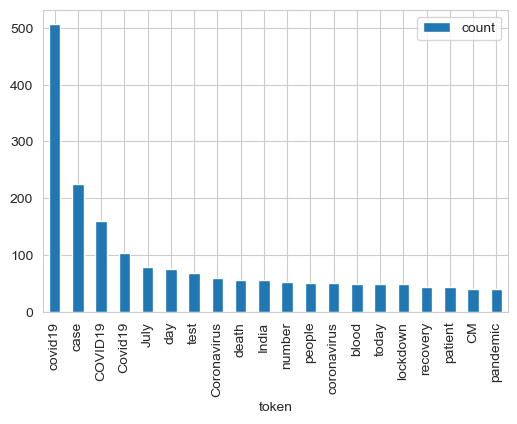

In [81]:

# convert list of tuples into data frame
freq_df = pd.DataFrame.from_records(counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
freq_df.plot(kind='bar', x='token');

[('covid19', 2852),
 ('case', 1081),
 ('COVID19', 713),
 ('Covid19', 506),
 ('people', 409),
 ('death', 376),
 ('mask', 359),
 ('day', 283),
 ('coronavirus', 254),
 ('➖', 248),
 ('Coronavirus', 231),
 ('risk', 218),
 ('time', 218),
 ('today', 216),
 ('pandemic', 203),
 ('country', 199),
 ('test', 190),
 ('July', 177),
 ('number', 176),
 ('health', 175)]

C:\Users\victo\anaconda3\envs\Analitica\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 10134 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\victo\anaconda3\envs\Analitica\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 10134 missing from current font.
  font.set_text(s, 0, flags=flags)


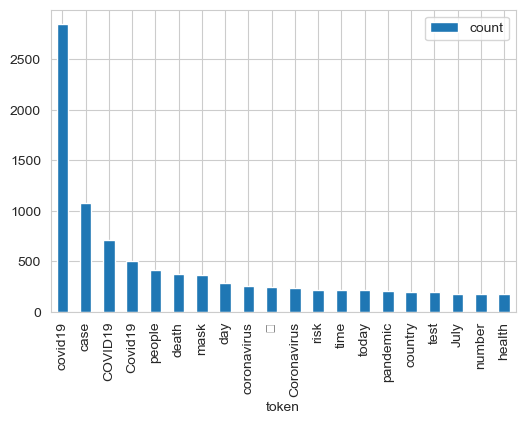

In [83]:
sub_df = df[df['user_verified']==False]
tokens = sub_df.text_nouns.map(my_tokenizer).sum()
counter = Counter(remove_hashtag(tokens))
freq_df = pd.DataFrame.from_records(counter.most_common(20),
                                    columns=['token', 'count'])
freq_df.plot(kind='bar', x='token');
counter.most_common(20)